In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [259]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [260]:
target_latency = 150

In [261]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
root_folder = "../measurements/direct_split/"
mag_folder = "../measurements_vidvrd/test_ltl_15/"

# local_df = pd.read_csv("../measurements_vidvrd/local_test/map.csv")
# root_folder = "../measurements_vidvrd/direct_split_quantize/"
# mag_folder = "../measurements_vidvrd/test_ltl_15/"

# local_df = pd.read_csv("../measurements_bev/local_test/map.csv")
# root_folder = "../measurements_bev/direct_split_quantize/"
# mag_folder = "../measurements_bev/test_ltl_15/"


map_df = pd.read_csv(root_folder+"map.csv")
cha_df = pd.read_csv(mag_folder+"characteristic.csv")
mag_df = pd.read_csv(mag_folder+"manager.csv")
tim_df = pd.read_csv(root_folder+"time.csv")

In [262]:
tim_df

,frame_id,head_time,serialize_time,tail_time
0,1,251.897247,1.949280,245.601593
1,2,10.437856,1.732736,12.188576
2,3,10.358304,1.262400,11.950112
3,4,10.314208,1.238080,12.023968
4,5,10.317920,1.150144,11.950688
...,...,...,...,...
445,446,10.202848,0.949024,11.892960
446,447,10.211776,0.970272,11.910368
447,448,10.226464,0.913472,11.876288
448,449,10.256960,0.974432,11.898048


In [263]:
drops = []

for i in range(400):
    try:
        d = mag_df[mag_df["frame_id"]==i+1]["drop"].tolist()[0]
        if d >0.4:
            d=0.4
        drops.append(d)
    except:
        drops.append(drops[-1])


df = pd.DataFrame()
df["traget_drops"] = drops

In [264]:
df["map_drop"] = local_df["map"] - map_df["map"]
df["sen_drop"] = local_df["sensitivity"] - map_df["sensitivity"]

In [265]:
df["bandwidth"] = cha_df["bandwidth"]

In [266]:
tim_df["head_est"] = tim_df["head_time"]*10
tim_df["ser_est"] = tim_df["serialize_time"]*10
tim_df["tran_est"] = (target_latency - tim_df["head_est"] - tim_df["ser_est"] - tim_df["tail_time"])/1000 # last is the edge time
df["bw_com"] = map_df["datasize"]/tim_df["tran_est"]

In [267]:
df = df[200:]

In [268]:
df

,traget_drops,map_drop,sen_drop,bandwidth,bw_com
200,0.4,0.0,0.0,18000000.0,1.530959e+07
201,0.4,0.0,0.0,18000000.0,1.440310e+07
202,0.4,0.0,0.0,18000000.0,1.403667e+07
203,0.4,0.0,0.0,18000000.0,1.419249e+07
204,0.4,0.0,0.0,18000000.0,1.440192e+07
...,...,...,...,...,...
395,0.4,0.0,0.0,18000000.0,1.391640e+07
396,0.4,0.0,0.0,18000000.0,1.433650e+07
397,0.4,0.0,0.0,18000000.0,1.450765e+07
398,0.4,0.0,0.0,18000000.0,1.392683e+07


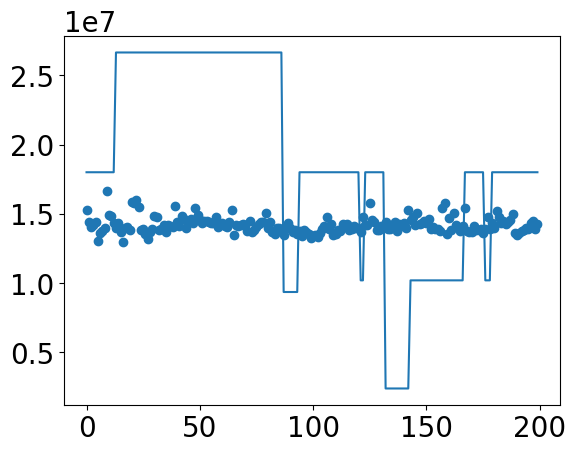

In [269]:
plt.plot(np.arange(200),df["bandwidth"])
plt.scatter(np.arange(200),df["bw_com"])

In [270]:
good_df = df[df["map_drop"]<df["traget_drops"]]
good_df= good_df[good_df["sen_drop"]<good_df["traget_drops"]]
good_df= good_df[good_df["bw_com"]<good_df["bandwidth"]]
# good_df= good_df[good_df["overall_time"]<target_latency]

In [271]:
good_df

,traget_drops,map_drop,sen_drop,bandwidth,bw_com
200,0.4,0.0,0.0,18000000.0,1.530959e+07
201,0.4,0.0,0.0,18000000.0,1.440310e+07
202,0.4,0.0,0.0,18000000.0,1.403667e+07
203,0.4,0.0,0.0,18000000.0,1.419249e+07
204,0.4,0.0,0.0,18000000.0,1.440192e+07
...,...,...,...,...,...
395,0.4,0.0,0.0,18000000.0,1.391640e+07
396,0.4,0.0,0.0,18000000.0,1.433650e+07
397,0.4,0.0,0.0,18000000.0,1.450765e+07
398,0.4,0.0,0.0,18000000.0,1.392683e+07


In [272]:
len(good_df)/200

0.765